<a href="https://colab.research.google.com/github/LuccaFurtado/PDI/blob/main/Pdi_Frequ%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from skimage.io import imread
import scipy.fftpack as fp
import matplotlib.pyplot as plt

Imagem Lena e sua respectiva DFT em 2 dimensões:

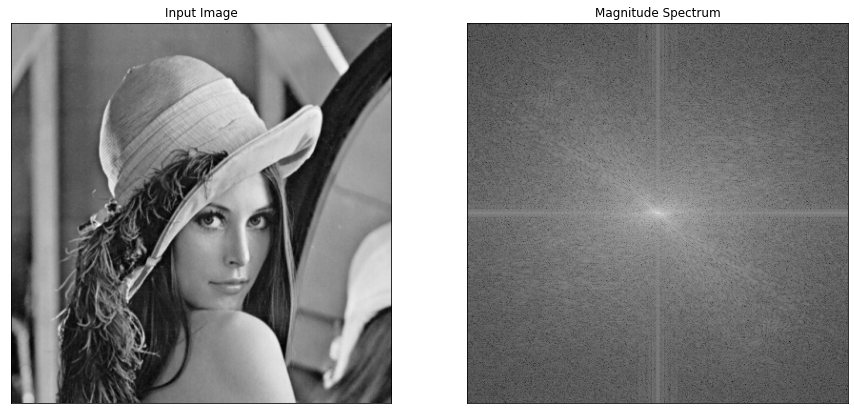

In [14]:

img = cv.imread('Lena.pgm',-1)
f = np.fft.fft2(img)
fshift_img = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift_img)+1)
plt.figure(figsize=(15,8))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Aplicação dos filtros Butterworth e Gaussiano passa-baixa e passa-alta.

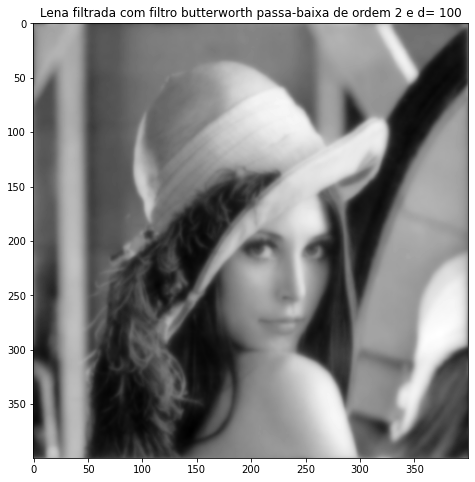

In [53]:
img=cv.imread('Lena.pgm',-1)
img=img.copy()
rows, cols = img.shape
mask = np.zeros((rows,cols))
crow,ccol = rows//2 , cols//2
d=100
n=2
for u in range(rows):
  for v in range(cols):
    duv=(np.sqrt((u-crow)**2+(v-ccol)**2))
    mask[u][v]=1/((1+ (duv/d))**(2*n))
  
  
mask=fp.ifftshift(mask)
img_f = fp.fft2((img))
out_f = np.multiply(img_f,mask)
img_out = fp.ifft2(out_f).real

magnitude_spectrum = np.log(np.abs(mask)+1)
plt.figure(figsize=(15,8))
plt.title(f'Lena filtrada com filtro butterworth passa-baixa de ordem {n} e d= {d}')
plt.imshow(img_out, cmap = 'gray')


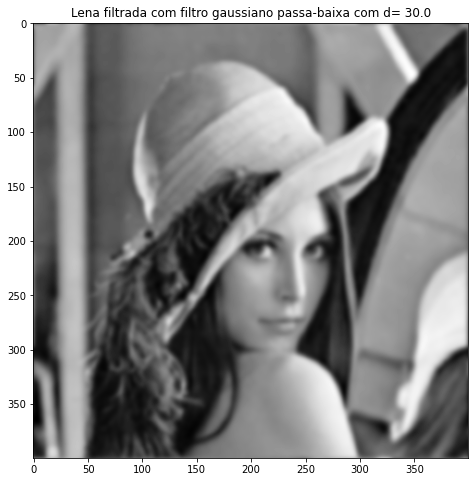

In [66]:
img=cv.imread('Lena.pgm',-1)
img=img.copy()
rows, cols = img.shape
mask = np.zeros((rows,cols))
crow,ccol = rows//2 , cols//2
d=30
d=d**2
for u in range(rows):
  for v in range(cols):
    duv=(np.sqrt((u-crow)**2+(v-ccol)**2))
    mask[u][v]=np.exp(-(duv**2)/(2*d))
  
  
mask=fp.ifftshift(mask)
img_f = fp.fft2((img))
out_f = np.multiply(img_f,mask)
img_out = fp.ifft2(out_f).real

magnitude_spectrum = np.log(np.abs(mask)+1)
plt.figure(figsize=(15,8))
plt.title(f'Lena filtrada com filtro gaussiano passa-baixa com d= {np.sqrt(d)}')
plt.imshow(img_out, cmap = 'gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


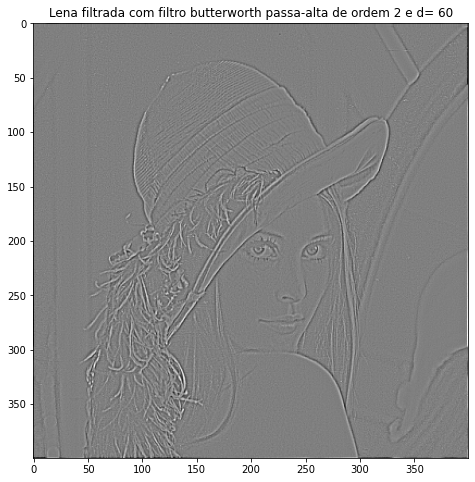

In [83]:
img=cv.imread('Lena.pgm',-1)
img=img.copy()
rows, cols = img.shape
mask = np.zeros((rows,cols))
crow,ccol = rows//2 , cols//2
d=60
n=2
for u in range(rows):
  for v in range(cols):
    duv=(np.sqrt((u-crow)**2+(v-ccol)**2))
    mask[u][v]=1/((1+ (d/duv))**(2*n))

  
mask=fp.ifftshift(mask)
img_f = fp.fft2((img))
out_f = np.multiply(img_f,mask)
img_out = fp.ifft2(out_f).real

magnitude_spectrum = np.log(np.abs(mask)+1)
plt.figure(figsize=(15,8))
plt.title(f'Lena filtrada com filtro butterworth passa-alta de ordem {n} e d= {d}')
plt.imshow(img_out, cmap = 'gray')

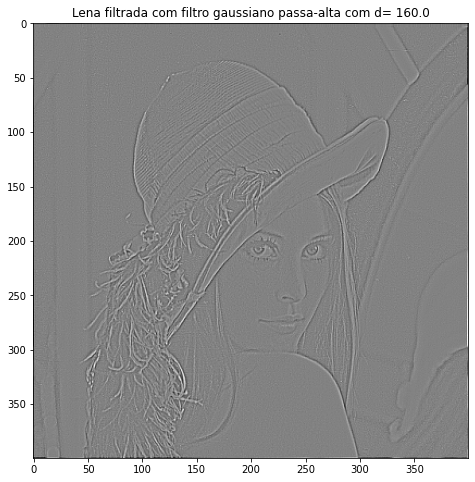

In [87]:
img=cv.imread('Lena.pgm',-1)
img=img.copy()
rows, cols = img.shape
mask = np.zeros((rows,cols))
crow,ccol = rows//2 , cols//2
d=160
d=d**2
for u in range(rows):
  for v in range(cols):
    duv=(np.sqrt((u-crow)**2+(v-ccol)**2))
    mask[u][v]= 1 - np.exp(-(duv**2)/(2*d))
  
  
mask=fp.ifftshift(mask)
img_f = fp.fft2((img))
out_f = np.multiply(img_f,mask)
img_out = fp.ifft2(out_f).real

magnitude_spectrum = np.log(np.abs(mask)+1)
plt.figure(figsize=(15,8))
plt.title(f'Lena filtrada com filtro gaussiano passa-alta com d= {np.sqrt(d)}')
plt.imshow(img_out, cmap = 'gray')

Função para filtragem na frequência com o filtro Gaussiano, da média, Laplaciano e de Sobel. Abordagem transformando a máscara no domínio espacial para o domínio da frequência e multiplicando nesse espaço.

In [89]:
def f_filter(img,type,n=3):
  img = cv.imread(img,-1)
  kernel=np.zeros((img.shape))

  if type=="gaussian":
    kernel = np.outer(signal.gaussian(img.shape[0], 3), signal.gaussian(img.shape[1], 3))
    kernel=fp.ifftshift(kernel)
  if type=="mean":
    kernel[0:n, 0:n]=(1/n)*np.ones((n,n))

  if type=="laplacian":
    kernel[0:3, 0:3]=np.array([[0, 1, 0],
                               [1,-4, 1],
                               [0, 1, 0]])
    
  if type=="sobelx":
    kernel[0:3, 0:3]=np.array([[-1, 0, 1],
                               [-2, 0, 2],
                               [-1, 0, 1]])
    
  if type=="sobely":
    kernel[0:3, 0:3]=np.array([[-1, -2, -1],
                               [0, 0, 0],
                               [1, 2, 1]])


  img_f = fp.fft2(fp.ifftshift(img))
  kernel_f = fp.fft2(fp.ifftshift(kernel))
  out_f = np.multiply(img_f,kernel_f)
  img_out = fp.ifft2(out_f).real

  plt.figure(figsize=(15,8))
  plt.subplot(121),plt.imshow(img, cmap = 'gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(img_out, cmap = 'gray')
  plt.title(f'{type.title()} Filtered Image'), plt.xticks([]), plt.yticks([])
  plt.show()

  


Aplicação do filtro Gaussiano na frequência.



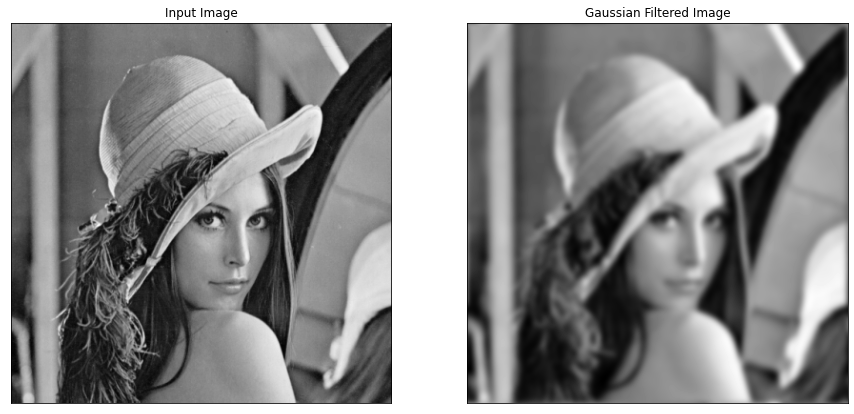

In [38]:
f_filter("Lena.pgm","gaussian",n=3)

Aplicação do filtro da média na frequência.


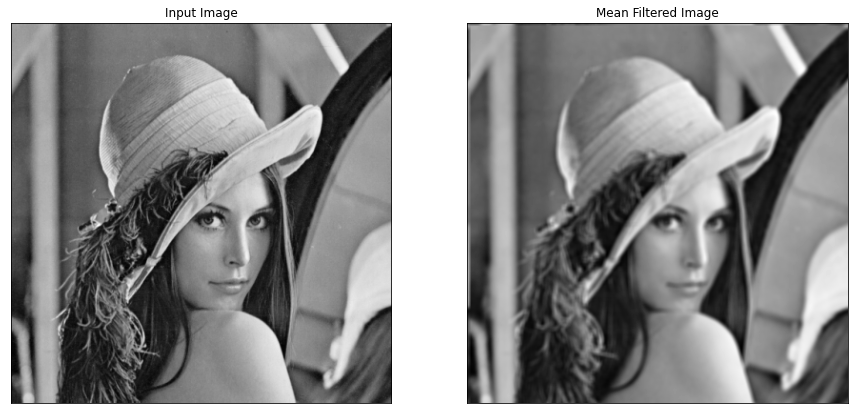

In [46]:
f_filter("Lena.pgm","mean",n=5)

Aplicação do filtro Laplaciano na frequência.


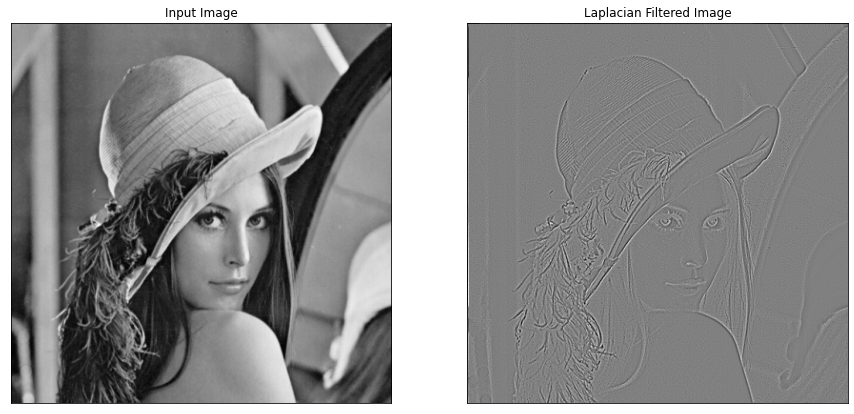

In [94]:
f_filter("Lena.pgm","laplacian")

Aplicação do filtro de Sobel X na frequência.


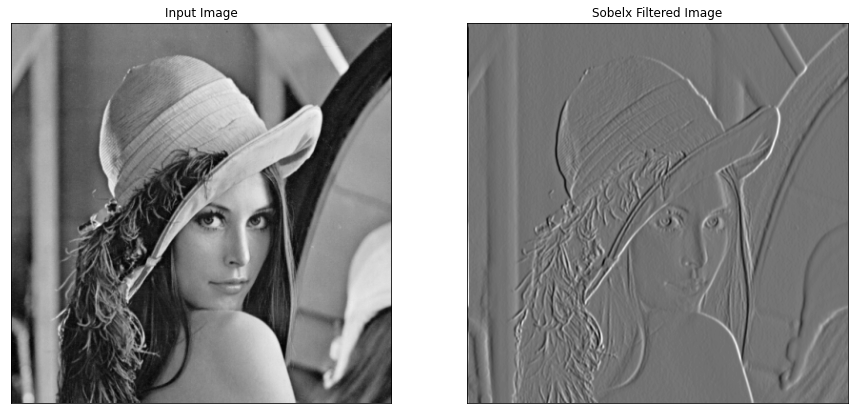

In [91]:
f_filter("Lena.pgm","sobelx")

Aplicação do filtro de Sobel Y na frequência.


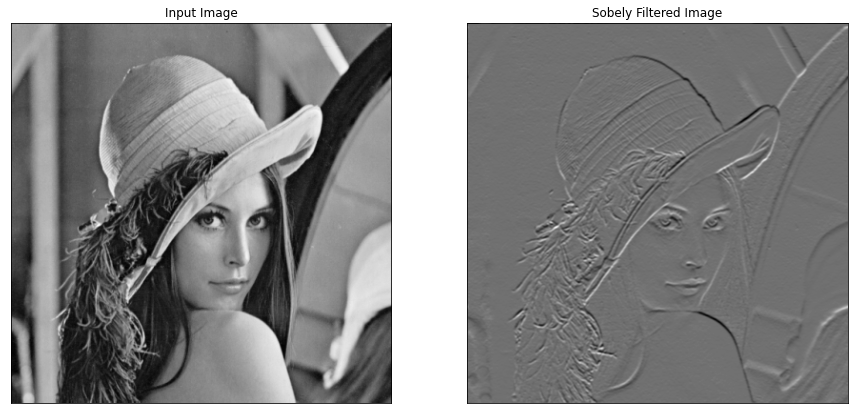

In [90]:
f_filter("Lena.pgm","sobely")